# Perceptronul liniar

Perceptronul liniar se bazează pe capacitatea de separaţie a unui hiperplan. Cel mai simplu de înţeles este în 2D - aici hiperplanul devine o banală dreaptă. Dacă $f(x) = 0$ este ecuaţia care descrie dreapta, punctele de pe dreaptă sunt cele pentru care, evident, $f(x) = 0$. Dacă $f(x_1) < 0$, punctul $x_1$ aparţine unei clase, iar dacă $f(x_2) > 0$, $x_2$ aparţine celeilalte clase. Dreapta devine astfel un discriminator liniar. "Perceptronul liniar" este denumirea foarte pompoasă dată unei drepte folosite ca discriminator liniar.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Reprezentarea perceptronului liniar

Ne propunem în continuare să reprezentăm un astfel de discriminator liniar în 2D (două dimensiuni). Vom face următoarele lucruri:
* definim funcţia $y=f(x)$, ca fiind ordonata $y$ în funcţie de abscisa $x$ (ca să putem reprezenta);
* definim funcţia $g(x)=w^T x$ care calculează produsul scalar între $w$ şi $x$, unde $x$ este extins să aibă o componentă $1$ iar $w$ este extins cu coeficientul $b$ din [curs](https://github.com/lmsasu/cursuri/tree/master/InteligentaArtificiala/curs);
* luăm puncte în plan;
* clasificăm fiecare punct din plan în funcţie de partea dreptei în care se află;
* desenăm dreapta.

Considerăm forma ecuaţiei dreptei ca fiind:

$$
g(x) = ax + by + 1 = 0
$$

De aici putem exprima $y$ ca:

$$y = f(x) = (-1 - ax) / b$$

Pentru un $x$ dat, vom folosi comparaţia lui $g(x)$ cu zero ca să clasificăm acel sample $x$.

In [3]:
# definim f(x, a, b) pentru calculul lui y asociat, de pe dreapta
def f(x, a, b):
    return (-1-a*x)/b


# definim g(x, y, a, b) pentru calculul poziţiei faţă de hiperplan (deasupra / dedesubt)
def g(x, y, a, b):
    return a*x + b*y + 1

# alegem un exemplu de hiperplan 2D (dreaptă) care trece prin punctele (0, 2) şi (3, 0)
# putem calcula astfel a şî b:
a, b = (-1.0 / 3), (-1.0 / 2)

# dreapta trebuie să treacă prin cele două puncte date mai sus
assert f(0, a, b) == 2.
assert f(3, a, b) == 0.
assert g(0, 2, a, b) == 0.
assert g(3, 0, a, b) == 0.

In [4]:
# porţiunea de plan pe care o reprezentăm este luată pentru x aparţine lui [-lim, lim] (limitele orizontale)
lim = 10

# numărul de puncte de fiecare fel
n = 100

# ne interesează, pentru reprezentare, limitele funcţiei [vmin, vmax] (limitele verticale)
vmin, vmax = f(-lim, a, b), f(lim, a, b)
if vmin > vmax:
    vmin, vmax = vmax, vmin

# alegem random uniform, în acest spaţiu, 2n puncte
u = 2 * lim * np.random.rand(2 * n) - lim
v = (vmax - vmin) * np.random.rand(2 * n) + vmin

# verificam ca punctele sunt luate în domeniu
assert np.all(np.logical_and(u <= lim, u >= -lim))
assert np.all(np.logical_and(v <= vmax, v >= vmin))

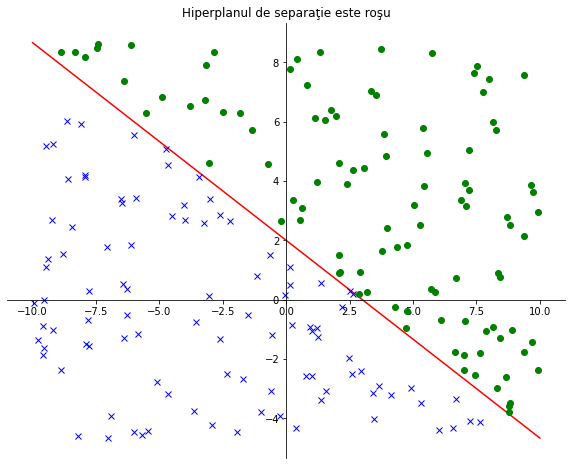

In [5]:
# alcătuim cele două clase de puncte
h1 = [z for z in zip(u, v) if g(z[0], z[1], a, b) >= 0]
h2 = [z for z in zip(u, v) if g(z[0], z[1], a, b) < 0]

# generăm valorile (x, y) pentru reprezentarea hiperplanului (dreptei) de separaţie
x = np.linspace(-lim, lim)
y = f(x, a, b)

# creăm o figură de tip subplot
fig = plt.figure(num=1, figsize=(10, 8)) 
ax = fig.add_subplot(111)
ax.set_title('Hiperplanul de separaţie este roşu')

# reprezentăm dreapta
ax.plot(x, y, 'r')

# punctele din cele două clase
ax.plot([i[0] for i in h1], [i[1] for i in h1], 'x' , color='blue')
ax.plot([i[0] for i in h2], [i[1] for i in h2], 'o' , color='green')

# aranjăm sistemul de coordonate
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

## 2. Antrenarea perceptronului liniar

Am văzut că perceptronul se bazează pe funcţia $g(x)$; pentru un sample $x$ dat, $g(x) \lessgtr 0$, semnul ne dă clasa în care $x$ este plasat de perceptron.

Pornim de la două clase de sample-uri. Fiecare $x$ are asociată clasa lui $y$, unde $y \in \{-1, +1\}$. Dacă funcţia perceptron (clasificator liniar) este $g(x) = w^T x$ (produs scalar), şi semnul ei ne dă eticheta dată de clasificator, atunci dacă am găsi soluţia $w$, avem pentru orice $x$, indiferent de clasă:

$$y \cdot g(x) \geq 0$$

Am dori să alegem un $w$ pentru care distincţia să fie destul de clară, şi atunci impunem ca produsul să fie nu doar pozitiv, ci, în plus:

$$y \cdot g(x) \geq 1$$

Echivalent:

$$1 - y \cdot g(x) \leq 0$$

Observăm că această relaţie este întotdeauna adevărată dacă $y$ coincide ca semn cu predicţia dată de clasificator, respectiv devine pozitivă când nu se întâmplă acest lucru.

Găsirea lui $w$ se rezumă la a minimiza funcţia:

$$J(w) = \max\left( 0, 1 - y \cdot g(x) \right) = \max\left( 0, 1 - y \cdot w^T x \right)$$

Ne interesează să minimizăm funcţia $J(w)$ doar pentru valorile sale pozitive.

Forma analitică a gradientului este:

$$\nabla_w J (x) = - y \cdot x$$

Mergând pe aceeaşi idee a update-ului cu gradientul negativ, regula de update a lui $w$ este:

$$ w_{k+1} \leftarrow w_{k} + \alpha \cdot y \cdot x$$

Aplicăm acest update doar pentru cazurile în care valorile $y$ şi $g(x)$ au semne diferite, sau mai concis pentru cazul în care $y \cdot g(x) < 0$. Să realizăm această antrenare pe exemplul anterior.

In [6]:
# iniţializam aleator coeficienţii hiperplanului
w= np.random.uniform(-10, 10, 3)
# păstrăm o copie ca să reprezentăm dreapta iniţială aleator aleasă
w_init = w.copy()
assert w.shape == (3,)

In [7]:
# funcţia de calcul a clasei; implementata ca lambda functie
# h(net) = +1 dacă net e mai mare sau egal cu zero
# h(net) = -1 dacă net e mai mic decât zero

# def h(x):
#     res = np.array([])
#     type(res)
#     for i in x:
#         res = np.append(res, np.array((-1 if i < 0 else 1)).reshape(1), axis = 0)
#     return res

# h = lambda net: np.array([-1 if i < 0 else 1 for i in net])
h = lambda net: (net >= 0) * 2 - 1
assert np.all(h(-np.random.randint(100, size=(10,))) == -1)
assert np.all(h(np.random.randint(100, size=(10,))) == +1)

In [8]:
# formăm matricea X de dimensiune (m, 3), cu prima coloana de '1'-uri, 
# a doua coloana sunt abscisele stocate in u iar
# a treia coloana ordonatele stocate in v
m = len(u)

x = np.concatenate((np.ones(m).reshape(-1,1), u.reshape(-1,1), v.reshape(-1,1)), axis=1)

assert len(v) == m

assert x.shape == (m, 3)
assert np.all(x[:, 0] == 1.)

In [9]:
# formam etichetele y pentru cele m sample-uri, pe baza functiilor g() si h() definite anterior
y = h(g(x[:,1], x[:,2], a, b))

assert y.shape == (m,)
assert np.abs(y).sum() == m

In [10]:
# learning rate
alpha = 0.2
epochs = 50

# câteva iteraţii sunt suficiente
# vom actualiza ponderile w de fiecare data, nu la sfarsitul buclei cum am facut anterior
for epoch in range(epochs):
    # pentru fiecare linie (pattern)
    for i in range(m):
        # vom 'trage' hiperplanul de separaţie în direcţia dorită
        # doar atunci cand eticheta y si cea estimata y_hat nu coincid
        if y[i] * h(w.T @ x[i]) < 0: # consditie adevarata dnd x[i] e de partea gresita a hiperplanului
            w += alpha * y[i] * x[i]
    
# să nu uităm să scalăm parametrii hiperplanului, pentru reprezentare
# am presupus forma 1 + ax + by = 0, ori, echivalent, w[0] + w[1] x + w[2] y = 0,
#   deci implicit am presupus w[0] = 1
w /= w[0]

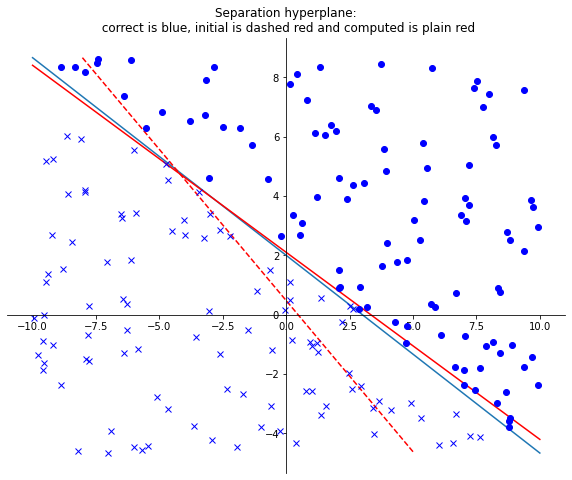

In [11]:
def hyper_plot(lim, a, b, w_init, w, h1, h2):
    fig = plt.figure(num=1, figsize=(10, 8)) 
    ax = fig.add_subplot(111)
    ax.set_title('Separation hyperplane:\n correct is blue, initial is dashed red and computed is plain red')

    # reprezentăm hiperplanul de la care am pornit
    x = np.linspace(-lim, lim)
    y = f(x, a, b)
    ax.plot(x, y)

    # reprezentăm hiperplanul iniţializat random
    xmin, xmax = (-1 - w_init[2] * vmin) / w_init[1], (-1 - w_init[2] * vmax) / w_init[1]
    xmin, xmax = (xmin, xmax) if xmin < xmax else (xmax, xmin)
    xmin, xmax = -lim if xmin < -lim else xmin, lim if xmax > lim else xmax
    
    x = np.linspace(xmin, xmax)
    y = f(x, w_init[1], w_init[2])
    ax.plot(x, y, linestyle='dashed', color='red')

    # reprezentăm hiperplanul calculat de instruire
    x = np.linspace(-lim, lim)
    y = f(x, w[1], w[2])
    ax.plot(x, y, color='red')

    # cele două clase
    ax.plot([i[0] for i in h1], [i[1] for i in h1], 'x' , color='blue')
    ax.plot([i[0] for i in h2], [i[1] for i in h2], 'o' , color='blue')

    # şi in fine axele de coordonate
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

# dreapta de separaţie este foarte aproape (uneori coincide) cu cea teoretică
hyper_plot(lim, a, b, w_init, w, h1, h2)

# 3. Perceptron pentru caracterele "0" şi "1" reprezentate ca rastru de pixeli

Trecem de la un spatiu cu 2 dimensiuni la un spatiu cu 35 de dimensiuni. De data aceasta, vrem ca un clasificator liniar (hiperplan) sa separe doua clase formate din cifre reprezentate sub forma de rastru de pixeli.

In [12]:
# am luat dimensiunea rastrului de 7 x 5
# de asemenea am 5 caractere de train din fiecare clasă,
# respectiv 3 caractere de test per clasă
train_set_x = np.array([
    [0, 1, 1, 1, 0, 
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     0, 1, 1, 1, 0],
    [0, 0, 1, 1, 0,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0,
     0, 1, 1, 1, 0,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     0, 1, 1, 1, 0,
     0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     1, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     1, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0]
])
train_set_y = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

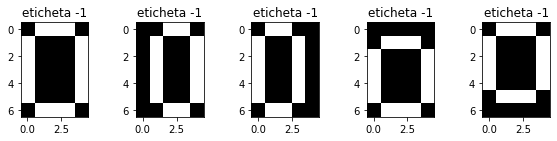

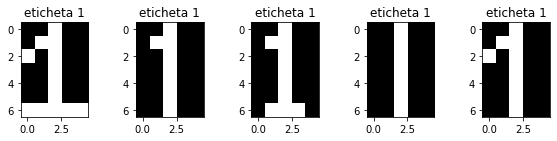

In [13]:
# afişăm setul definit
fig = plt.figure(num=1, figsize=(10, 8)) 
for i in range(0, 5):
    ax = fig.add_subplot(450 + i + 1)
    ax.imshow(255 * train_set_x[i].reshape(7, 5), cmap='gray')
    ax.set_title(f'eticheta {train_set_y[i]}')
    
fig = plt.figure(num=2, figsize=(10, 8)) 
for i in range(5, 10):
    ax = fig.add_subplot(450 + i - 4)
    ax.imshow(255 * train_set_x[i].reshape(7, 5), cmap='gray')
    ax.set_title(f'eticheta {train_set_y[i]}')

In [14]:
# setul de test are câte un pixel lipsă
test_set_x = np.array([
    [0, 1, 1, 1, 0, 
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 0,
     1, 0, 0, 0, 1,
     1, 0, 0, 0, 1,
     0, 1, 1, 1, 0],
    [0, 0, 1, 1, 0,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 1, 0, 0, 1,
     0, 0, 0, 0, 1,
     0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     1, 0, 0, 1, 0,
     0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     1, 0, 0, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0,
     0, 1, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 0, 0,
     0, 0, 1, 1, 0],
])
test_set_y = [-1, -1, -1, 1, 1, 1]

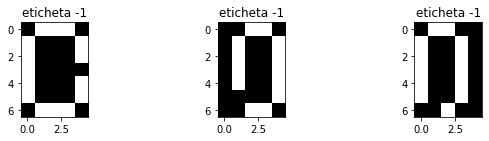

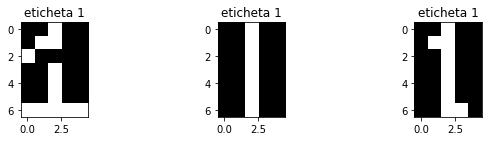

In [15]:
fig = plt.figure(num=3, figsize=(10, 8)) 
for i in range(0, 3):
    ax = fig.add_subplot(430 + i + 1)
    ax.imshow(255 * test_set_x[i].reshape(7, 5), cmap='gray')
    ax.set_title(f'eticheta {test_set_y[i]}')
    
fig = plt.figure(num=4, figsize=(10, 8)) 
for i in range(3, 6):
    ax = fig.add_subplot(430 + i - 2)
    ax.imshow(255 * test_set_x[i].reshape(7, 5), cmap='gray')
    ax.set_title(f'eticheta {test_set_y[i]}')

In [16]:
# funcţia de activare este o simplă treaptă (-1, 1) în jurul lui 0
h = lambda net: (net >= 0) * 2 - 1

assert np.all(h(-np.random.randint(100, size=(10,))) == -1)
assert np.all(h(np.random.randint(100, size=(10,))) == +1)

In [18]:
# iniţializăm matricea extinsă X folosind train_set_x
x = train_set_x
x = np.concatenate((np.ones(x.shape[0]).reshape(-1,1), x), axis=1)
assert x.shape == (10, 36)
assert np.all(x[:, 0] == 1)

In [19]:
# iniţializarea aleatoare a ponderilor
w = np.random.uniform(-1,1,36)
w = w.reshape(1, -1)

alpha = 0.3
epochs = 10

# print(x.shape)
# print(train_set_x.shape)
# print(len(train_set_y))
# print(w.shape)
# print('aici')
# print((x[0] @ w.T))
# print(h((x[0] @ w.T)))
# câteva iteraţii sunt suficiente
# vom actualiza ponderile w de fiecare data, nu la sfarsitul buclei cum am facut anterior
for epoch in range(epochs):
    # pentru fiecare linie (pattern)
    for i in range(x.shape[0]):
        # vom 'trage' hiperplanul de separaţie în direcţia dorită
        # doar atunci cand eticheta y si cea estimata y_hat nu coincid
#         if y[i] * h(w.T @ x[i]) < 0: # consditie adevarata dnd x[i] e de partea gresita a hiperplanului
        if train_set_y[i] * h(x[i] @ w.T) < 0: # consditie adevarata dnd x[i] e de partea gresita a hiperplanului
            w += alpha * train_set_y[i] * x[i]

In [26]:
# tipărim numărul de clasificări greşite pentru setul de instruire
print("train: ", h(x @ w.T).T, " vs. ", train_set_y, " diffs: ", np.sum(h(x @ w.T).T != train_set_y))

# cream matricea extinsa X pentru setul de test
test_set_x_ext = np.concatenate((np.ones(test_set_x.shape[0]).reshape(-1,1), test_set_x), axis=1)

# tipărim numărul de clasificări greşite şi pentru setul de test
print("test: ", h(test_set_x_ext @ w.T).T, " vs. ", test_set_y, 
      " diffs: ", np.sum(h(test_set_x_ext @ w.T).T != test_set_y))

# foarte rar apare o diferenţă

train:  [[-1 -1 -1 -1 -1  1  1  1  1  1]]  vs.  [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]  diffs:  0
test:  [[-1 -1 -1 -1  1  1]]  vs.  [-1, -1, -1, 1, 1, 1]  diffs:  1
